In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# reading data
myDF = pd.read_excel("Copy of Folds5x2_pp.xlsx", sheet_name="Sheet1")

In [3]:
def find_mean(data):
    mean = np.mean(data)
    return mean

In [4]:
def find_median(data):
    median = np.median(data)
    return median

In [5]:
def find_std_dev(data):
    std_dev = np.std(data)
    return std_dev

In [6]:
# calculating statistics for each column
print("Statistics for each column:\n")

for i, column in enumerate(myDF.columns):
    data = myDF.iloc[:, i].values
    
    print(f"\nColumn: {column}")
    print(f"  Mean: {find_mean(data):.4f}")
    print(f"  Median: {find_median(data):.4f}")
    print(f"  Standard Deviation: {find_std_dev(data):.4f}")
    

Statistics for each column:


Column: AT
  Mean: 19.6512
  Median: 20.3450
  Standard Deviation: 7.4521

Column: V
  Mean: 54.3058
  Median: 52.0800
  Standard Deviation: 12.7072

Column: AP
  Mean: 1013.2591
  Median: 1012.9400
  Standard Deviation: 5.9385

Column: RH
  Mean: 73.3090
  Median: 74.9750
  Standard Deviation: 14.5995

Column: PE
  Mean: 454.3650
  Median: 451.5500
  Standard Deviation: 17.0661


In [7]:
# calculating outliers using Z-scoring
print("\nOutliers for each column (Z-score > 3):\n")

for i, column in enumerate(myDF.columns):
    data = myDF.iloc[:, i].values
    
    mean = find_mean(data)
    std_dev = find_std_dev(data)
    
    z_scores = (data - mean) / std_dev
    outliers = data[np.abs(z_scores) > 3]
    
    print(f"\nColumn: {column}")
    print(f"Number of outliers: {len(outliers)}")
    if len(outliers) > 0:
        print(f"Outlier values: \n{outliers}")
    else:
        print("No outliers found")


Outliers for each column (Z-score > 3):


Column: AT
Number of outliers: 0
No outliers found

Column: V
Number of outliers: 0
No outliers found

Column: AP
Number of outliers: 51
Outlier values: 
[1033.25 1031.1  1033.04 1033.3  1032.67 1033.08  994.17  995.24 1031.55
 1031.5  1031.96 1032.98 1032.93 1031.33 1033.19 1031.96 1032.86 1032.77
 1033.09 1031.8  1032.08  993.31 1033.14 1032.88 1032.72 1031.45 1032.14
  995.02 1031.14  993.82 1032.83 1032.37 1032.16 1031.16  994.6   993.74
 1031.39 1031.2  1031.27 1031.97 1033.29 1031.58 1031.08  993.11 1031.75
 1031.21 1031.34  992.89 1031.71 1031.21 1031.32]

Column: RH
Number of outliers: 7
Outlier values: 
[25.89 28.16 29.43 26.67 25.56 28.81 26.3 ]

Column: PE
Number of outliers: 0
No outliers found


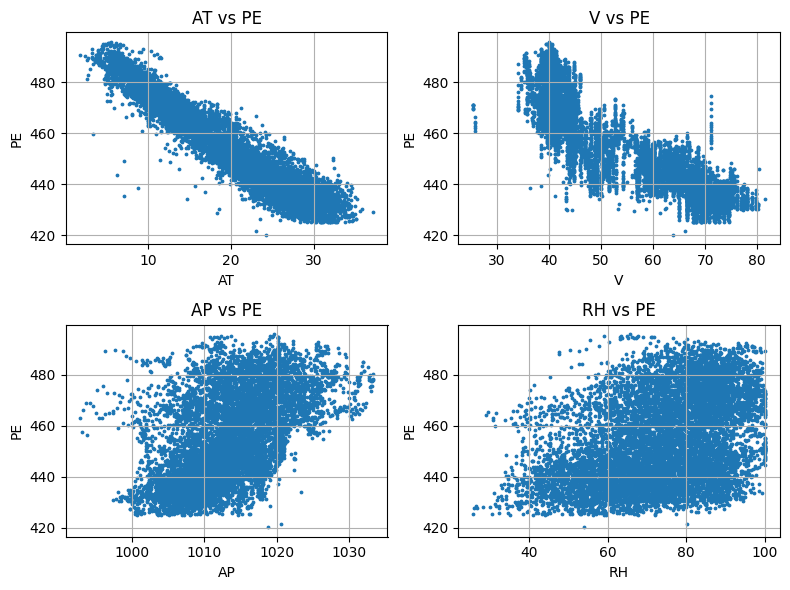

In [8]:
# creating scatter plots for each column

input_columns = [col for col in myDF.columns if col != 'PE']
output_column = 'PE'
num_input_columns = len(input_columns)
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

# flattenning axes array to 1D
axes = axes.flatten()

for i, column in enumerate(input_columns):
    x_data = myDF[column].values
    y_data = myDF[output_column].values
    
    axes[i].scatter(x_data, y_data, s=3)
    axes[i].set_title(f'{column} vs {output_column}')
    axes[i].set_xlabel(f'{column}')
    axes[i].set_ylabel(f'{output_column}')
    axes[i].grid(True)

# hiding the last subplot since we only have 5 columns
#if num_columns < len(axes):
    #axes[num_columns].set_visible(False)

plt.tight_layout()
plt.show()